In [1]:
import pandas as pd
import random
import numpy as np
from pandas import read_csv
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# DATA CLEANING

In [3]:
# Clean states dataset

In [4]:
# path = r'final_proj_data/covid19/4.18states.csv'
states = pd.read_csv('4.18states.csv')
states.head(1)

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-04-18 22:32:47,32.3182,-86.9023,4712,153,NaN,4559.0,1.0,100.492717,42538.0,620.0,3.247029,84000001,USA,907.206961,13.157895


In [5]:
states = states.drop(columns=['Last_Update', 'FIPS', 'Incident_Rate']).iloc[:,:11]
states = states.rename(columns={'Long_' : 'Lon'})
states

,Province_State,Country_Region,Lat,Lon,Confirmed,Deaths,Recovered,Active,People_Tested,People_Hospitalized,Mortality_Rate
0,Alabama,US,32.3182,-86.9023,4712,153,NaN,4559.0,42538.0,620.0,3.247029
1,Alaska,US,61.3707,-152.4044,314,9,147.0,305.0,9655.0,39.0,2.866242
2,American Samoa,US,-14.2710,-170.1320,0,0,NaN,NaN,3.0,NaN,NaN
3,Arizona,US,33.7298,-111.4312,4724,180,539.0,4544.0,51045.0,566.0,3.810330
4,Arkansas,US,34.9697,-92.3731,1744,38,703.0,1706.0,24141.0,291.0,2.178899
...,...,...,...,...,...,...,...,...,...,...,...
135,Xinjiang,China,41.1129,85.2401,76,3,73.0,0.0,NaN,NaN,3.947368
136,Yukon,Canada,64.2823,-135.0000,9,0,0.0,9.0,NaN,NaN,0.000000
137,Yunnan,China,24.9740,101.4870,184,2,177.0,5.0,NaN,NaN,1.086957
138,Zhejiang,China,29.1832,120.0934,1268,1,1246.0,21.0,NaN,NaN,0.078864


In [6]:
number_of_cases_by_country = pd.DataFrame(states)
number_of_cases_by_country = number_of_cases_by_country.drop(columns=['Lat', 'Lon']).iloc[:,:6]
number_of_cases_by_country = number_of_cases_by_country.groupby(by=['Country_Region']).sum() 
number_of_cases_by_country

,Confirmed,Deaths,Recovered,Active
Country_Region,,,,
Australia,6547,67,4124.0,2356.0
Canada,34356,1400,10964.0,21992.0
China,83787,4636,77614.0,1537.0
Denmark,195,0,184.0,11.0
France,1180,22,604.0,554.0
Netherlands,177,12,67.0,98.0
US,732197,38664,116230.0,628693.0
United Kingdom,1097,34,414.0,649.0


In [7]:
# Clean abridged counties dataset

In [8]:
# path = r'final_proj_data/covid19/abridged_couties.csv'
abridged_counties = pd.read_csv('abridged_couties.csv')
abridged_counties.head(1)

,countyFIPS,STATEFP,COUNTYFP,CountyName,StateName,State,lat,lon,POP_LATITUDE,POP_LONGITUDE,...,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban,SVIPercentile,HPSAShortage,HPSAServedPop,HPSAUnderservedPop
0,01001,1.0,1.0,Autauga,AL,Alabama,32.540091,-86.645649,32.500389,-86.494165,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.4354,NaN,NaN,NaN


In [9]:
abridged_counties.columns

Index(['countyFIPS', 'STATEFP', 'COUNTYFP', 'CountyName', 'StateName', 'State',
       'lat', 'lon', 'POP_LATITUDE', 'POP_LONGITUDE', 'CensusRegionName',
       'CensusDivisionName', 'Rural-UrbanContinuumCode2013',
       'PopulationEstimate2018', 'PopTotalMale2017', 'PopTotalFemale2017',
       'FracMale2017', 'PopulationEstimate65+2017',
       'PopulationDensityperSqMile2010', 'CensusPopulation2010',
       'MedianAge2010', '#EligibleforMedicare2018',
       'MedicareEnrollment,AgedTot2017', '3-YrDiabetes2015-17',
       'DiabetesPercentage', 'HeartDiseaseMortality', 'StrokeMortality',
       'Smokers_Percentage', 'RespMortalityRate2014', '#FTEHospitalTotal2017',
       'TotalM.D.'s,TotNon-FedandFed2017', '#HospParticipatinginNetwork2017',
       '#Hospitals', '#ICU_beds', 'dem_to_rep_ratio', 'PopMale<52010',
       'PopFmle<52010', 'PopMale5-92010', 'PopFmle5-92010', 'PopMale10-142010',
       'PopFmle10-142010', 'PopMale15-192010', 'PopFmle15-192010',
       'PopMale20-242010', 'P

In [10]:
# abridged_counties = abridged_counties.iloc[:,4:81]
# abridged_counties = abridged_counties.drop(abridged_counties.iloc[:, 3:65], inplace = True, axis = 1) 
# abridged_counties
# drop all columns besides last few + smoker, heart disease

In [11]:
# Clean confirmed cases dataset

In [12]:
# path = r'final_proj_data/covid19/time_series_covid19_confirmed_US.csv'
confirmed = pd.read_csv('time_series_covid19_confirmed_US.csv')
confirmed.head(1)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271,-170.132,...,0,0,0,0,0,0,0,0,0,0


In [13]:
confirmed.columns

Index(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_', 'Combined_Key', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20',
       '4/2/20', '4/3/20', '4

In [14]:
confirmed_dates = confirmed.iloc[:,6:].drop(columns=['Lat', 'Long_', 'Combined_Key'])
confirmed_dates

,Province_State,Country_Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
0,American Samoa,US,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Guam,US,0,0,0,0,0,0,0,0,...,128,130,133,133,133,133,135,135,136,136
2,Northern Mariana Islands,US,0,0,0,0,0,0,0,0,...,11,11,11,11,11,11,13,13,13,14
3,Puerto Rico,US,0,0,0,0,0,0,0,0,...,683,725,788,897,903,923,974,1043,1068,1118
4,Virgin Islands,US,0,0,0,0,0,0,0,0,...,45,50,51,51,51,51,51,51,51,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3250,Wisconsin,US,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3251,Wyoming,US,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3252,Grand Princess,US,0,0,0,0,0,0,0,0,...,103,103,103,103,103,103,103,103,103,103
3253,Michigan,US,0,0,0,0,0,0,0,0,...,0,0,0,0,370,429,472,472,514,550


In [15]:
# Clean death cases dataset

In [16]:
# path = r'final_proj_data/covid19/time_series_covid19_deaths_US.csv'
deaths = pd.read_csv('time_series_covid19_deaths_US.csv')
deaths.head(1)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271,-170.132,...,0,0,0,0,0,0,0,0,0,0


In [17]:
deaths.columns

Index(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_', 'Combined_Key', 'Population',
       '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
       '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20',
       '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20',
       '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20',
       '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20',
       '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20',
       '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20',
       '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20',
       '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20',
       '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20',
       '3/31/20', '4/1/20', '4/2/20'

In [18]:
#deaths per dat
death_dates = deaths.iloc[:,6:].drop(columns=['Lat', 'Long_', 'Combined_Key','Country_Region','Population'])
death_sum = death_dates.groupby(['Province_State']).sum()
death_sum

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,0,0,0,...,70,80,92,93,99,114,118,133,148,153
Alaska,0,0,0,0,0,0,0,0,0,0,...,7,7,8,8,8,9,9,9,9,9
American Samoa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arizona,0,0,0,0,0,0,0,0,0,0,...,89,97,108,115,122,131,142,150,169,180
Arkansas,0,0,0,0,0,0,0,0,0,0,...,21,21,25,27,29,32,33,37,37,38
California,0,0,0,0,0,0,0,0,0,0,...,544,583,604,640,714,767,860,956,1037,1140
Colorado,0,0,0,0,0,0,0,0,0,0,...,193,226,250,289,306,327,328,355,372,389
Connecticut,0,0,0,0,0,0,0,0,0,0,...,380,448,494,554,602,671,868,971,1036,1086
Delaware,0,0,0,0,0,0,0,0,0,0,...,23,32,33,35,41,43,46,55,61,67


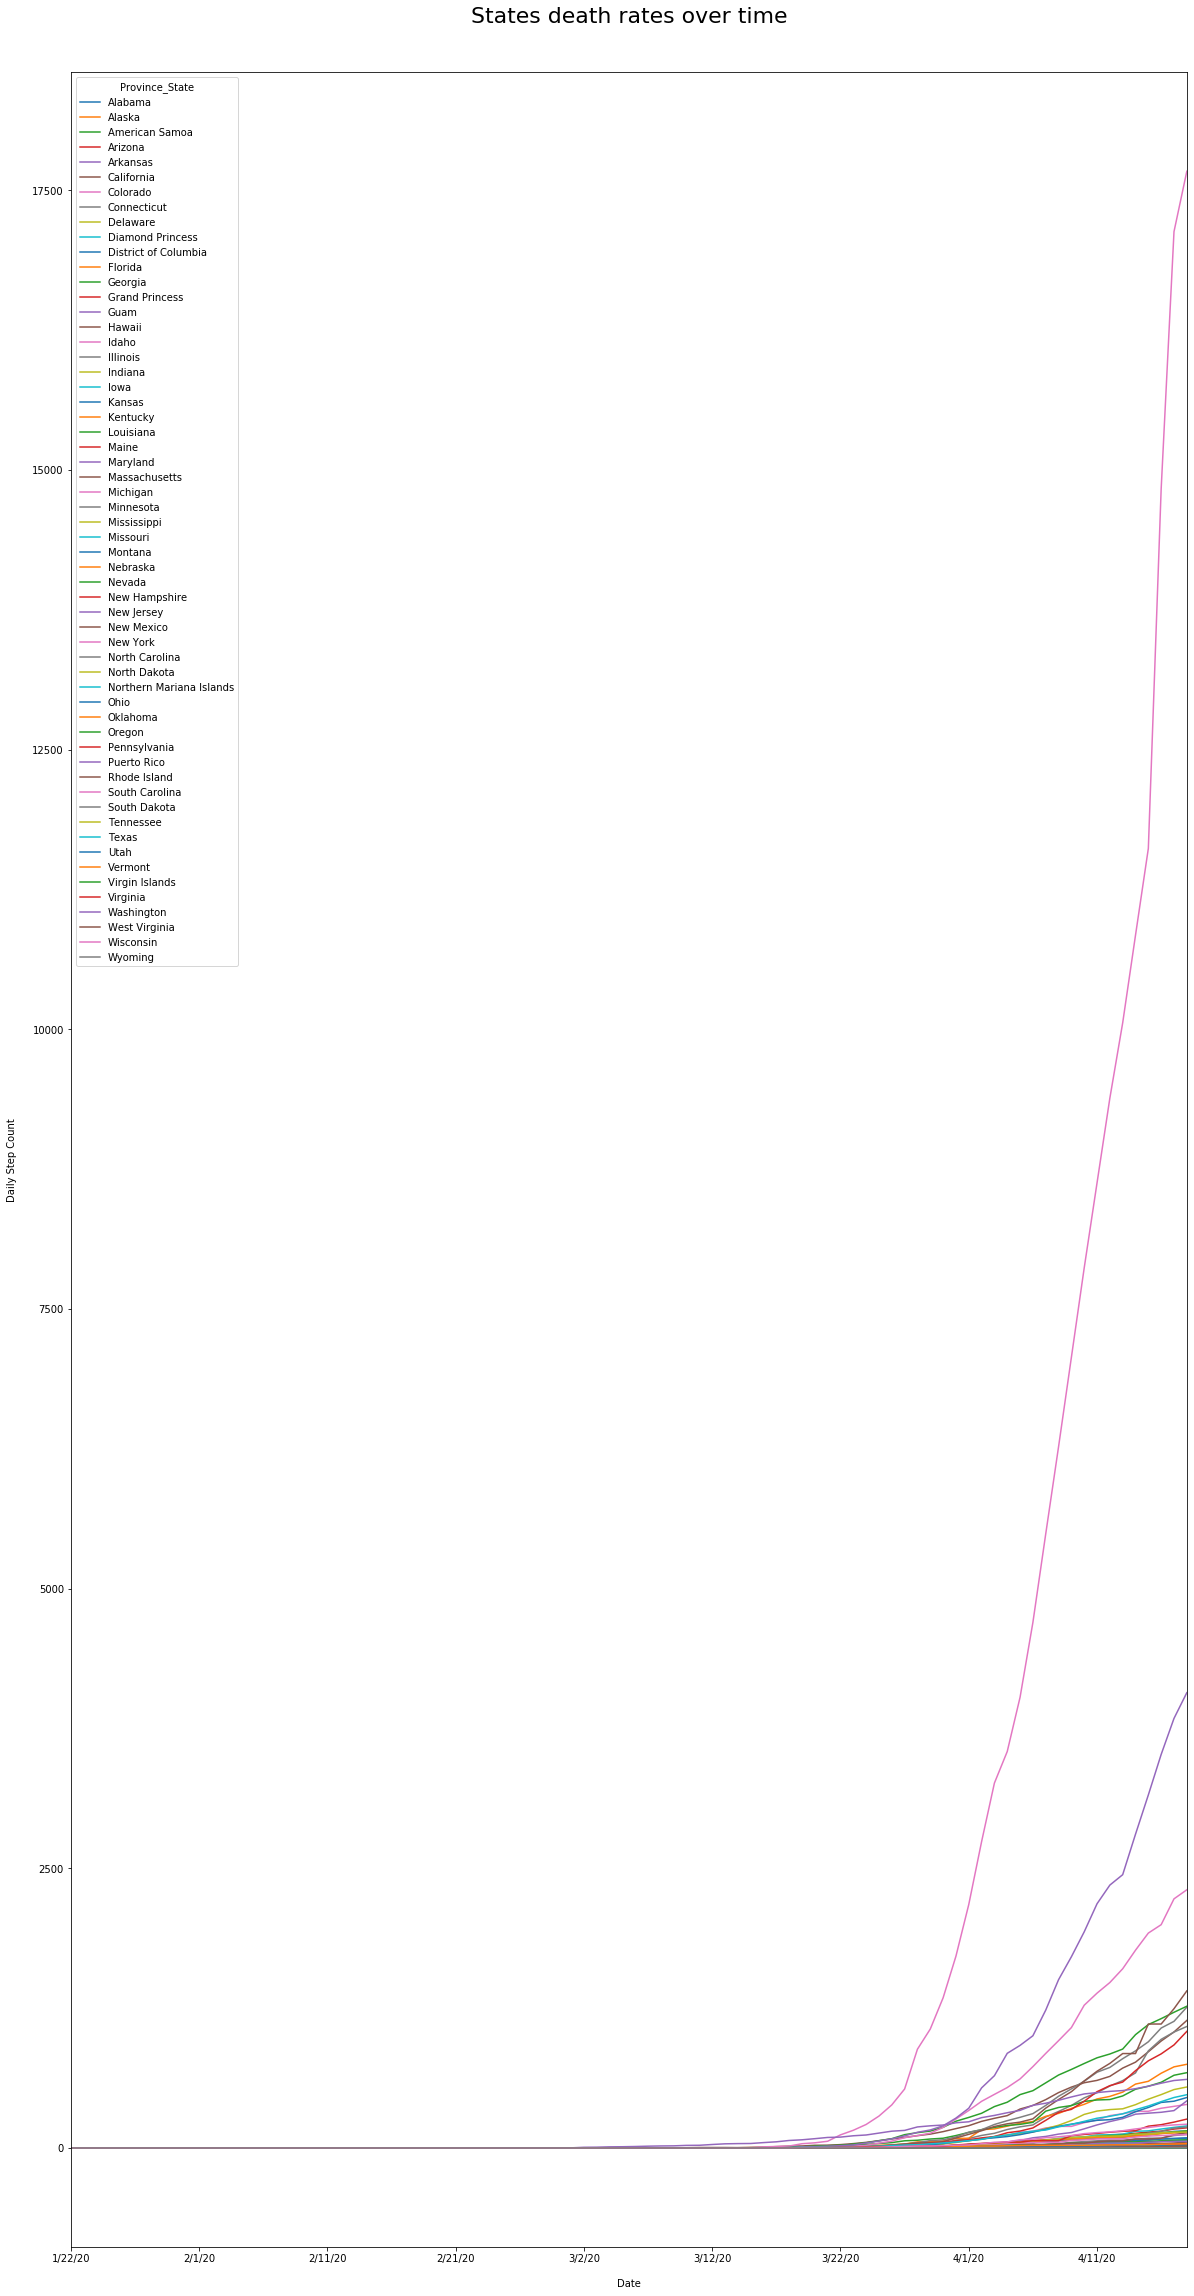

In [19]:
death_sum.T.plot(figsize=(20,40))
plt.xlabel("Date", labelpad=15)
plt.ylabel("Daily Step Count", labelpad=15)
plt.title("States death rates over time", y=1.02, fontsize=22);
# LEGEND MOVE!!!

In [20]:
# WORK ON MODEL

In [21]:
# Question:
# Suppose you wanted to model the number of coronavirus cases in the US
# predictive model of future cases (linear regression, decision tree, random forest)
# inference-- number of cases, linear regression-- what region are they in, get coefficients for variables
# regions in n america may develop more cases than asia
# line plot
# What kind of model and features would you use?
# visualizations have some kind of purpose
# plot the number of cases by date in the US
# drop the dates w NaN dropna

In [22]:
# Bar graph of number of cases in each country

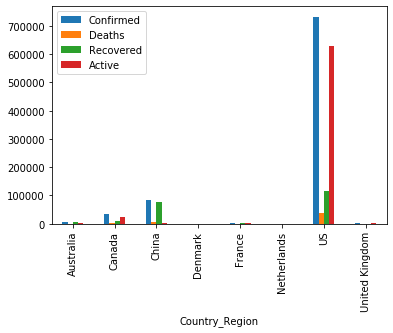

In [23]:
number_of_cases_by_country = number_of_cases_by_country.plot(kind='bar')

In [24]:
abridged_counties = pd.read_csv('abridged_couties.csv')
abridged_counties

,countyFIPS,STATEFP,COUNTYFP,CountyName,StateName,State,lat,lon,POP_LATITUDE,POP_LONGITUDE,...,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban,SVIPercentile,HPSAShortage,HPSAServedPop,HPSAUnderservedPop
0,01001,1.0,1.0,Autauga,AL,Alabama,32.540091,-86.645649,32.500389,-86.494165,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.4354,NaN,NaN,NaN
1,01003,1.0,3.0,Baldwin,AL,Alabama,30.738314,-87.726272,30.548923,-87.762381,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.2162,NaN,NaN,NaN
2,01005,1.0,5.0,Barbour,AL,Alabama,31.874030,-85.397327,31.844036,-85.310038,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.9959,6.08,5400.0,18241.0
3,01007,1.0,7.0,Bibb,AL,Alabama,32.999024,-87.125260,33.030921,-87.127659,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.6003,2.75,14980.0,6120.0
4,01009,1.0,9.0,Blount,AL,Alabama,33.990440,-86.562711,33.955243,-86.591491,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.4242,7.21,31850.0,25233.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3239,15005,15.0,5.0,Kalawao,HI,NaN,NaN,NaN,21.188495,-156.979972,...,737509.0,737507.0,737504.0,737509.0,737500.0,737495.0,0.3162,NaN,NaN,NaN
3240,72039,72.0,39.0,Ciales Municipio,PR,NaN,NaN,NaN,18.314399,-66.494215,...,NaN,737500.0,737499.0,737499.0,737500.0,737495.0,NaN,NaN,NaN,NaN
3241,72069,72.0,69.0,Humacao Municipio,PR,NaN,NaN,NaN,18.144804,-65.817109,...,NaN,737500.0,737499.0,737499.0,737500.0,737495.0,NaN,NaN,NaN,NaN
3242,City1,NaN,NaN,New York City,NY,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
#Group by "abridged counties" by state, select columns of relevance
abridged_counties = pd.read_csv('abridged_couties.csv')
abridged_counties_select_col = abridged_counties[['StateName','lat', 'lon','>500 gatherings', 'public schools', 'restaurant dine-in','entertainment/gym','PopulationDensityperSqMile2010','CensusPopulation2010','MedianAge2010']]
abridged_counties_select_col = abridged_counties_select_col.groupby(['lat','lon']).sum()
abridged_counties_select_col 
abridged_counties


,countyFIPS,STATEFP,COUNTYFP,CountyName,StateName,State,lat,lon,POP_LATITUDE,POP_LONGITUDE,...,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban,SVIPercentile,HPSAShortage,HPSAServedPop,HPSAUnderservedPop
0,01001,1.0,1.0,Autauga,AL,Alabama,32.540091,-86.645649,32.500389,-86.494165,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.4354,NaN,NaN,NaN
1,01003,1.0,3.0,Baldwin,AL,Alabama,30.738314,-87.726272,30.548923,-87.762381,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.2162,NaN,NaN,NaN
2,01005,1.0,5.0,Barbour,AL,Alabama,31.874030,-85.397327,31.844036,-85.310038,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.9959,6.08,5400.0,18241.0
3,01007,1.0,7.0,Bibb,AL,Alabama,32.999024,-87.125260,33.030921,-87.127659,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.6003,2.75,14980.0,6120.0
4,01009,1.0,9.0,Blount,AL,Alabama,33.990440,-86.562711,33.955243,-86.591491,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.4242,7.21,31850.0,25233.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3239,15005,15.0,5.0,Kalawao,HI,NaN,NaN,NaN,21.188495,-156.979972,...,737509.0,737507.0,737504.0,737509.0,737500.0,737495.0,0.3162,NaN,NaN,NaN
3240,72039,72.0,39.0,Ciales Municipio,PR,NaN,NaN,NaN,18.314399,-66.494215,...,NaN,737500.0,737499.0,737499.0,737500.0,737495.0,NaN,NaN,NaN,NaN
3241,72069,72.0,69.0,Humacao Municipio,PR,NaN,NaN,NaN,18.144804,-65.817109,...,NaN,737500.0,737499.0,737499.0,737500.0,737495.0,NaN,NaN,NaN,NaN
3242,City1,NaN,NaN,New York City,NY,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# #Sum deaths per row 
# deaths = deaths.rename(columns={'Lat': 'lat', 'Long_': 'lon'})
# death_dates = deaths.iloc[:, 8:200]
# death_dates = death_dates.set_index(['lat','lon'])
# death_dates

In [27]:
total_deaths = death_dates.sum(axis=1)
#Total deaths per location (based on long, lat)
total_deaths = pd.DataFrame(total_deaths)
total_deaths = total_deaths.rename(columns={0: 'total_deaths'}).reset_index()
total_deaths = total_deaths[total_deaths.total_deaths >= 0]
total_deaths
# print (total_deaths['lat'].dtype)
# print (join_death_states['lat'].dtype)

,index,total_deaths
0,0,0
1,1,89
2,2,30
3,3,650
4,4,17
...,...,...
3250,3250,13
3251,3251,3
3252,3252,56
3253,3253,73


In [28]:
# #Join above table with confirmed deaths
# total_deaths = total_deaths.rename(columns={'Lat': 'lat', 'Long_': 'lon'})
# join_death_states =  pd.merge(abridged_counties_grouped_state, total_deaths, on=['lat', 'lon'], how="left")
# #drop rows with 0 lat 0 long
# join_death_states = join_death_states[join_death_states.lat != 0]
# join_death_states 

In [29]:
#add abbrev to states df
state_labels = pd.read_csv('states.csv')
joined_states = state_labels.set_index('State').join(states.set_index('Province_State'))
joined_states.head(3)

,Abbrev,Country_Region,Lat,Lon,Confirmed,Deaths,Recovered,Active,People_Tested,People_Hospitalized,Mortality_Rate
Alabama,AL,US,32.3182,-86.9023,4712,153,NaN,4559.0,42538.0,620.0,3.247029
Alaska,AK,US,61.3707,-152.4044,314,9,147.0,305.0,9655.0,39.0,2.866242
Arizona,AZ,US,33.7298,-111.4312,4724,180,539.0,4544.0,51045.0,566.0,3.810330


In [30]:
abridged_counties

,countyFIPS,STATEFP,COUNTYFP,CountyName,StateName,State,lat,lon,POP_LATITUDE,POP_LONGITUDE,...,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban,SVIPercentile,HPSAShortage,HPSAServedPop,HPSAUnderservedPop
0,01001,1.0,1.0,Autauga,AL,Alabama,32.540091,-86.645649,32.500389,-86.494165,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.4354,NaN,NaN,NaN
1,01003,1.0,3.0,Baldwin,AL,Alabama,30.738314,-87.726272,30.548923,-87.762381,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.2162,NaN,NaN,NaN
2,01005,1.0,5.0,Barbour,AL,Alabama,31.874030,-85.397327,31.844036,-85.310038,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.9959,6.08,5400.0,18241.0
3,01007,1.0,7.0,Bibb,AL,Alabama,32.999024,-87.125260,33.030921,-87.127659,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.6003,2.75,14980.0,6120.0
4,01009,1.0,9.0,Blount,AL,Alabama,33.990440,-86.562711,33.955243,-86.591491,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.4242,7.21,31850.0,25233.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3239,15005,15.0,5.0,Kalawao,HI,NaN,NaN,NaN,21.188495,-156.979972,...,737509.0,737507.0,737504.0,737509.0,737500.0,737495.0,0.3162,NaN,NaN,NaN
3240,72039,72.0,39.0,Ciales Municipio,PR,NaN,NaN,NaN,18.314399,-66.494215,...,NaN,737500.0,737499.0,737499.0,737500.0,737495.0,NaN,NaN,NaN,NaN
3241,72069,72.0,69.0,Humacao Municipio,PR,NaN,NaN,NaN,18.144804,-65.817109,...,NaN,737500.0,737499.0,737499.0,737500.0,737495.0,NaN,NaN,NaN,NaN
3242,City1,NaN,NaN,New York City,NY,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
#
#
#
#START MULTIPLE LIN REGRESSION

In [35]:
#join abridged_counties with states df
abridged_states_sum = abridged_counties.groupby('State').sum()
abridged_states_sum.head(5)
abridged_states_mean = abridged_counties.groupby('State').mean()
#HPSA underserved pop as % of total pop
HPSA_shortage_percentage = abridged_states_sum['HPSAUnderservedPop'] / abridged_states_sum['PopulationEstimate2018']
HPSA_shortage_percentage.head(5)
# % of 65+ enrolled in Medicare
medicare_percentage = abridged_states_sum['MedicareEnrollment,AgedTot2017'] / abridged_states_sum['PopulationEstimate65+2017']
medicare_percentage
# mean % of SVI per state
SVI_mean_percentage = abridged_states_mean['SVIPercentile']
SVI_mean_percentage

wellness_data = abridged_states_sum[['PopulationEstimate2018']]
wellness_data['HPSA_shortage_%'] = HPSA_shortage_percentage
wellness_data['Medicare_percentage'] = medicare_percentage
wellness_data['SVI_mean_percentage'] = SVI_mean_percentage

/srv/conda/envs/data100/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/srv/conda/envs/data100/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/srv/conda/envs/data100/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [36]:
states_group = states.groupby('Province_State').sum().reset_index().rename(columns={'Province_State': 'State'})
states_group
new_df = wellness_data.merge(states_group, on=['State'], how='left')
new_df

,State,PopulationEstimate2018,HPSA_shortage_%,Medicare_percentage,SVI_mean_percentage,Lat,Lon,Confirmed,Deaths,Recovered,Active,People_Tested,People_Hospitalized,Mortality_Rate
0,Alabama,4887871.0,0.151394,0.972710,0.702722,32.3182,-86.9023,4712.0,153.0,0.0,4559.0,42538.0,620.0,3.247029
1,Arizona,7171646.0,0.000000,0.892300,0.846067,33.7298,-111.4312,4724.0,180.0,539.0,4544.0,51045.0,566.0,3.810330
2,Arkansas,3013825.0,0.053718,0.963630,0.718023,34.9697,-92.3731,1744.0,38.0,703.0,1706.0,24141.0,291.0,2.178899
3,California,39557045.0,0.000559,0.956897,0.634397,36.1162,-119.6816,30491.0,1140.0,0.0,29351.0,251614.0,4892.0,3.738808
4,Colorado,5695564.0,0.041515,0.965034,0.395428,39.0598,-105.3111,9047.0,389.0,0.0,8658.0,43307.0,1755.0,4.299768
5,Connecticut,3572665.0,0.000000,0.950457,0.316962,41.5978,-72.7554,17550.0,1086.0,0.0,16464.0,55462.0,1946.0,6.188034
6,Delaware,967171.0,0.122356,0.956779,0.501600,39.3185,-75.5071,2538.0,67.0,423.0,2471.0,14017.0,224.0,2.639874
7,District Of Columbia,702455.0,0.000000,0.907708,0.596500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Florida,21299325.0,0.072221,0.889059,0.660049,27.7663,-81.6868,25492.0,748.0,0.0,24744.0,246527.0,3842.0,2.934254
9,Georgia,10519475.0,0.144887,0.952130,0.707984,33.0406,-83.6431,17669.0,673.0,0.0,16996.0,74208.0,3420.0,3.808931


In [48]:
select_col = ['HPSA_shortage_%', 'Medicare_percentage', 'SVI_mean_percentage']
new_df['Mortality_Rate'] = new_df['Mortality_Rate'].dropna()
new_df = new_df.sort_values('Mortality_Rate', ascending=True)

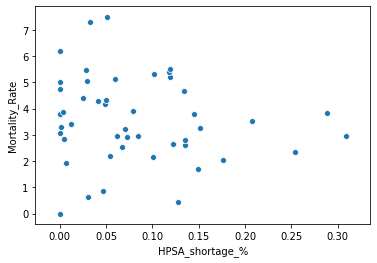

In [49]:
sns.scatterplot(x='HPSA_shortage_%', y='Mortality_Rate', data=new_df);
#Thought that increased HPSA shortage would lead to increase in mortality...but doesen't seem to have much correlation


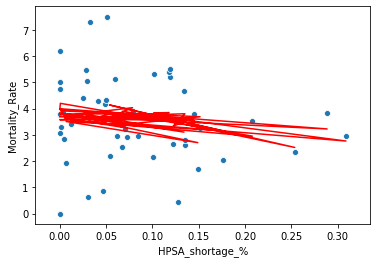

In [45]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X = new_df[select_col] , y = new_df['Mortality_Rate'])
predicted_mortality = model.predict(new_df[select_col])
sns.scatterplot(x='HPSA_shortage_%', y='Mortality_Rate', data=new_df)
plt.plot(new_df['HPSA_shortage_%'],  predicted_mortality, color='r')

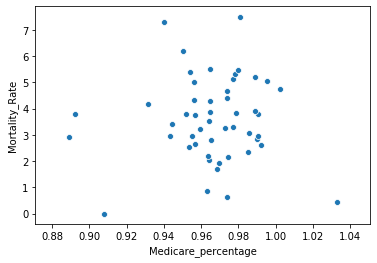

In [50]:
sns.scatterplot(x='Medicare_percentage', y='Mortality_Rate', data=new_df);
#seems not related

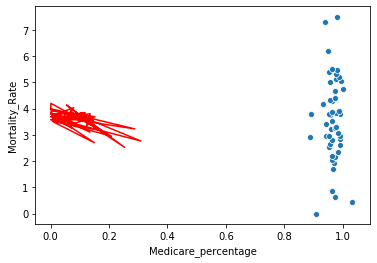

In [51]:
sns.scatterplot(x='Medicare_percentage', y='Mortality_Rate', data=new_df)
plt.plot(new_df['HPSA_shortage_%'],  predicted_mortality, color='r')

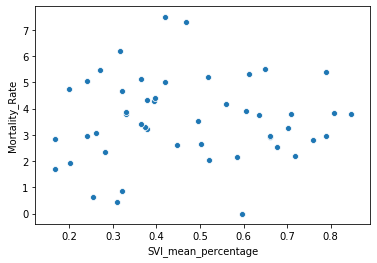

In [52]:
sns.scatterplot(x='SVI_mean_percentage', y='Mortality_Rate', data=new_df);
#seems not related either

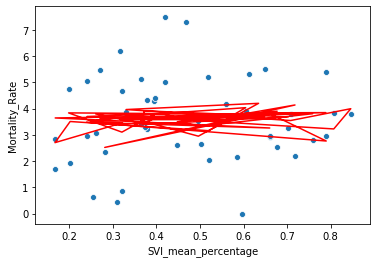

In [47]:
sns.scatterplot(x='SVI_mean_percentage', y='Mortality_Rate', data=new_df)
plt.plot(new_df['SVI_mean_percentage'],  predicted_mortality, color='r')

In [54]:
#
#
#
#Look at population, age groups

In [66]:
abridged_states_ages = abridged_states_sum.iloc[:, 7:30]
abridged_states_ages.head(5)

,PopTotalMale2017,PopTotalFemale2017,FracMale2017,PopulationEstimate65+2017,PopulationDensityperSqMile2010,CensusPopulation2010,MedianAge2010,#EligibleforMedicare2018,"MedicareEnrollment,AgedTot2017",3-YrDiabetes2015-17,...,StrokeMortality,Smokers_Percentage,RespMortalityRate2014,#FTEHospitalTotal2017,"TotalM.D.'s,TotNon-FedandFed2017",#HospParticipatinginNetwork2017,#Hospitals,#ICU_beds,dem_to_rep_ratio,PopMale<52010
State,,,,,,,,,,,,,,,,,,,,,
Alabama,2359836.0,2514911.0,32.618674,803771.0,6044.5,4779736.0,2636.9,1080141.0,781836.0,1006.0,...,3447.2,1339.278504,5177.96,88369.0,12954.0,11.0,86.0,1533.0,53.994321,155265.0
Arizona,3488301.0,3527969.0,7.550242,1201746.0,780.7,6392017.0,579.8,1346727.0,1072318.0,2050.0,...,463.5,247.258666,779.53,98442.0,20222.0,27.0,76.0,1559.0,14.621107,232562.0
Arkansas,1476064.0,1528215.0,37.115582,499144.0,4076.8,2915918.0,3023.7,670352.0,480990.0,716.0,...,3576.1,1529.163651,5454.53,58025.0,7753.0,32.0,74.0,732.0,39.123691,100950.0
California,19647553.0,19889100.0,29.284783,5505358.0,38468.8,37253956.0,2233.2,6466995.0,5268063.0,9122.0,...,2197.7,701.312786,3024.91,551825.0,137635.0,107.0,329.0,7338.0,95.220305,1294056.0
Colorado,2822333.0,2784821.0,33.231605,772042.0,9337.9,5029196.0,2641.0,965047.0,745047.0,816.0,...,2102.5,915.039844,3906.76,82584.0,19021.0,21.0,80.0,1095.0,55.707172,176361.0


In [56]:
abridged_states_sum

,STATEFP,COUNTYFP,lat,lon,POP_LATITUDE,POP_LONGITUDE,Rural-UrbanContinuumCode2013,PopulationEstimate2018,PopTotalMale2017,PopTotalFemale2017,...,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban,SVIPercentile,HPSAShortage,HPSAServedPop,HPSAUnderservedPop
State,,,,,,,,,,,,,,,,,,,,,
Alabama,67.0,4489.0,2203.491648,-5809.523075,2202.847785,-5808.962671,311.0,4887871.0,2359836.0,2514911.0,...,49412299.0,49412500.0,49412701.0,49413304.0,49412500.0,49412165.0,47.0824,241.6928,1215462.0,739993.0
Arizona,60.0,208.0,505.175270,-1672.005326,503.716457,-1672.168700,57.0,7171646.0,3488301.0,3527969.0,...,11062515.0,11062500.0,11062545.0,11062545.0,11062500.0,11062425.0,12.6910,0.0000,0.0,0.0
Arkansas,375.0,5625.0,2618.337238,-6932.819154,2619.302009,-6932.102170,423.0,3013825.0,1476064.0,1528215.0,...,55313250.0,55312575.0,55312725.0,55312725.0,55312500.0,55312125.0,53.8517,52.3839,351204.0,161897.0
California,348.0,3364.0,2195.388719,-7002.010076,2193.636548,-7009.759026,194.0,39557045.0,19647553.0,19889100.0,...,42775174.0,42775174.0,42774942.0,42774942.0,42775000.0,42774710.0,36.7950,7.9650,42532.0,22114.0
Colorado,512.0,3983.0,2491.738210,-6751.228336,2492.574873,-6750.211067,371.0,5695564.0,2822333.0,2784821.0,...,47199808.0,47200448.0,47200256.0,47200064.0,47200000.0,47199680.0,25.3074,75.7573,209926.0,236454.0
Connecticut,72.0,64.0,332.942428,-581.253698,332.662659,-581.247047,15.0,3572665.0,1751800.0,1836384.0,...,5900056.0,5900008.0,5900000.0,5900000.0,5900000.0,5899960.0,2.5357,0.0000,0.0,0.0
Delaware,30.0,9.0,117.336746,-226.635757,117.470627,-226.539629,6.0,967171.0,465514.0,496425.0,...,2212524.0,2212500.0,2212488.0,2212488.0,2212500.0,2212485.0,1.5048,39.4500,0.0,118339.0
District Of Columbia,11.0,1.0,38.910787,-77.034099,38.910270,-77.014468,1.0,702455.0,329199.0,364773.0,...,737509.0,737500.0,737500.0,737500.0,737500.0,737495.0,0.5965,0.0000,0.0,0.0
Florida,804.0,4550.0,1939.472510,-5541.000977,1939.192836,-5540.527284,214.0,21299325.0,10256819.0,10727581.0,...,49412567.0,49412500.0,49412768.0,49412768.0,49412500.0,49412165.0,44.2233,511.4300,480175.0,1538260.0
